In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#df_person = pd.read_csv('/home/ayoub/hetbot_ws/src/fusion_pkg/src/per.csv', sep = ',')
"""df_person2 = pd.read_csv('/home/ayoub/hetbot_ws/src/fusion_pkg/src/Static_Person.csv', sep = ';')
df_person2.columns = ["num","width","length","S","density","x_std","y_std","range_mean","l","range_std","i_peak","vel_std"]
df_person2['vel_std'] = pd.to_numeric(df_person2['vel_std'], errors='coerce')
df_person2['vel_std'] = df_person2['vel_std'].astype(float)
df_person2['num'] = df_person2['num'].astype(float)
df_person2 = df_person2.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
df_person2["label"] = "static_person" """




#df_stat = pd.read_csv('/home/ayoub/catkin_ws/src/rc_fusion/src/stat.csv', sep = ',')
df_stat = pd.read_csv('/home/ayoub/hetbot_ws/person.csv', sep = ';')
df_stat.columns = ["num","width","length","S","density","x_std","y_std","range_mean","l","range_std","i_peak","vel_std"]
df_stat = df_stat.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
df_stat["label"] = "person"
df_pp = df_stat.loc[(df_stat["vel_std"] > 0.4)  | (df_stat["vel_std"] < -0.4)]




df_static_person = pd.read_csv('/home/ayoub/hetbot_ws/Static_Person.csv', sep = ';')
df_static_object = pd.read_csv('/home/ayoub/hetbot_ws/Static_objects.csv', sep = ';')


#print(df_person2)
df_static_person.columns = ["num","width","length","S","density","x_std","y_std","range_mean","l","range_std","i_peak","vel_std"]
df_static_person['vel_std'] = pd.to_numeric(df_static_person['vel_std'], errors='coerce')
df_static_person['vel_std'] = df_static_person['vel_std'].astype(float)
df_static_person['num'] = df_static_person['num'].astype(float)
df_static_person = df_static_person.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
df_static_person = df_static_person.loc[(df_static_person["vel_std"] <= 0.20)  & (df_static_person["vel_std"] >= -0.20)]
print(df_pp)

df_static_object.columns = ["num","width","length","S","density","x_std","y_std","range_mean","l","range_std","i_peak","vel_std"]
df_static_object['vel_std'] = pd.to_numeric(df_static_object['vel_std'], errors='coerce')
df_static_object['vel_std'] = df_static_object['vel_std'].astype(float)
df_static_object['num'] = df_static_object['num'].astype(float)
df_static_object = df_static_object.replace([np.inf, -np.inf], np.nan).dropna(axis=0)


#df_stat["label"] = "2"
df_static_person["label"] = "static_person"
df_static_object["label"] = "objects"
df_rf = pd.concat([df_pp,df_static_object,df_static_person,])#[df_person,df_stat,df_static_person]
#X = df_rf.drop(["label"], axis=1)
X = df_rf.drop(["label"], axis=1)
X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
#print(X)
X= X.to_numpy()
y= df_rf["label"]
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30,test_size = 0.2)



     num     width    length         S      density     x_std     y_std  \
3     24  0.336862  0.225786  0.076059   315.544637  0.057699  0.093099   
4     14  0.043939  0.205974  0.009050  1546.924710  0.073684  0.015280   
5      7  0.093369  0.124177  0.011594   603.742837  0.046082  0.032540   
7     15  0.247154  0.111304  0.027509   545.271138  0.031342  0.076429   
8      5  0.227931  0.066640  0.015189   329.176969  0.025423  0.110522   
..   ...       ...       ...       ...          ...       ...       ...   
391    7  0.016477  0.082705  0.001363  5136.763488  0.028293  0.006111   
392    8  0.021969  0.143648  0.003156  2534.986400  0.048240  0.007191   
395   11  0.036615  0.128080  0.004690  2345.553035  0.039842  0.012946   
397    6  0.083300  0.176511  0.014703   408.068287  0.062014  0.028541   
398    8  0.145547  0.200452  0.029175   274.206651  0.072285  0.052222   

     range_mean         l  range_std     i_peak   vel_std   label  
3      1.395050  0.263632   0.0

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,20,30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200,min_samples_split=2,min_samples_leaf=2,max_depth=10)
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=10, random_state=42, n_jobs = -1)
rf.fit(X_train, y_train)
#rf_random.best_params_

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200)

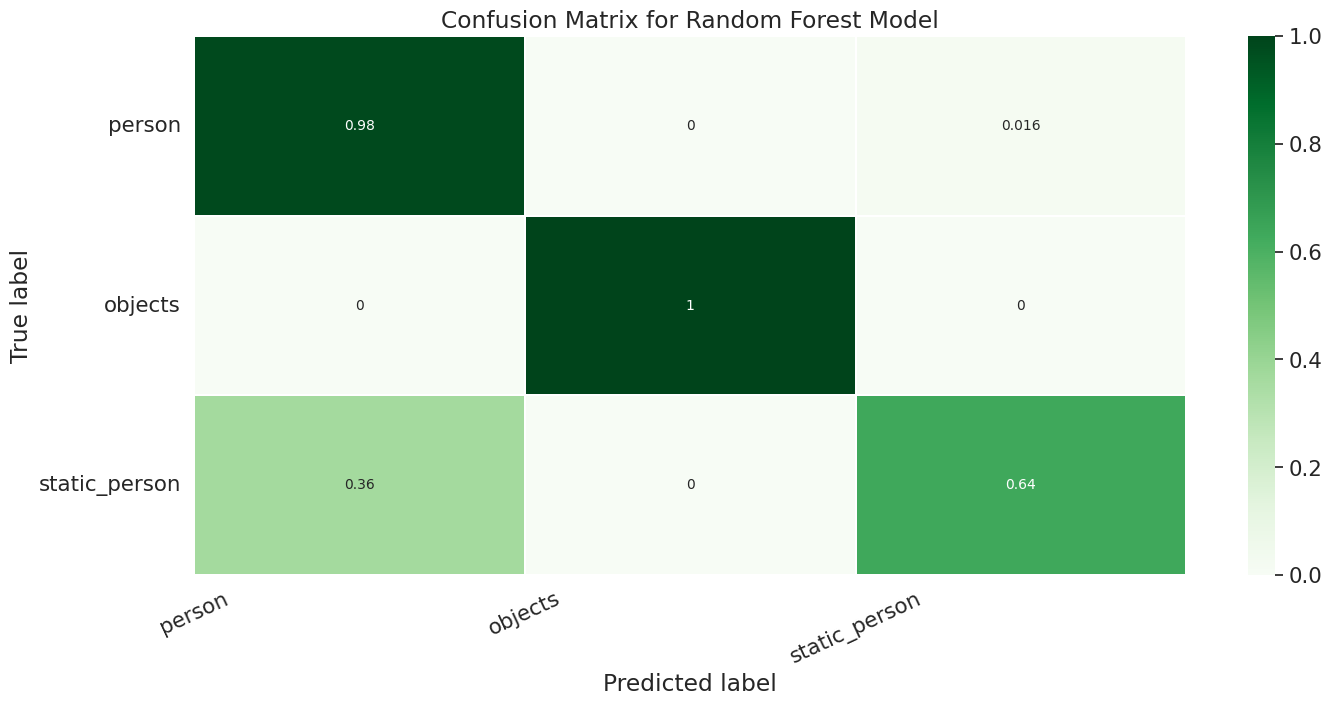

In [27]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
ypred = rf.predict(X_test)


matrix = confusion_matrix(y_test, ypred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['person','objects',"static_person"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')

plt.savefig("confusion.png")

In [ ]:
import joblib

joblib.dump(rf,'newest.joblib')